# Which populations are at risk of contracting COVID-19?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# Any results you write to the current directory are saved as output.

/kaggle/input/uncover/UNCOVER/hackathon_file_readme.txt
/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/2019-novel-coronavirus-covid-19-2019-ncov-data-repository-recovered.csv
/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv
/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/2019-novel-coronavirus-covid-19-2019-ncov-data-repository-deaths.csv
/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/2019-novel-coronavirus-covid-19-2019-ncov-data-repository-confirmed-cases-in-the-us.csv
/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases.csv
/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-over-time.csv
/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv
/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/2019-novel-coronavirus-covid-19-2019-ncov-data-repository-confirmed-cases.csv
/kaggle/input/unco

**Loading WHO Dataset**

In [3]:
cases=pd.read_csv('/kaggle/input/uncover/UNCOVER/WHO/who-situation-reports-covid-19.csv')

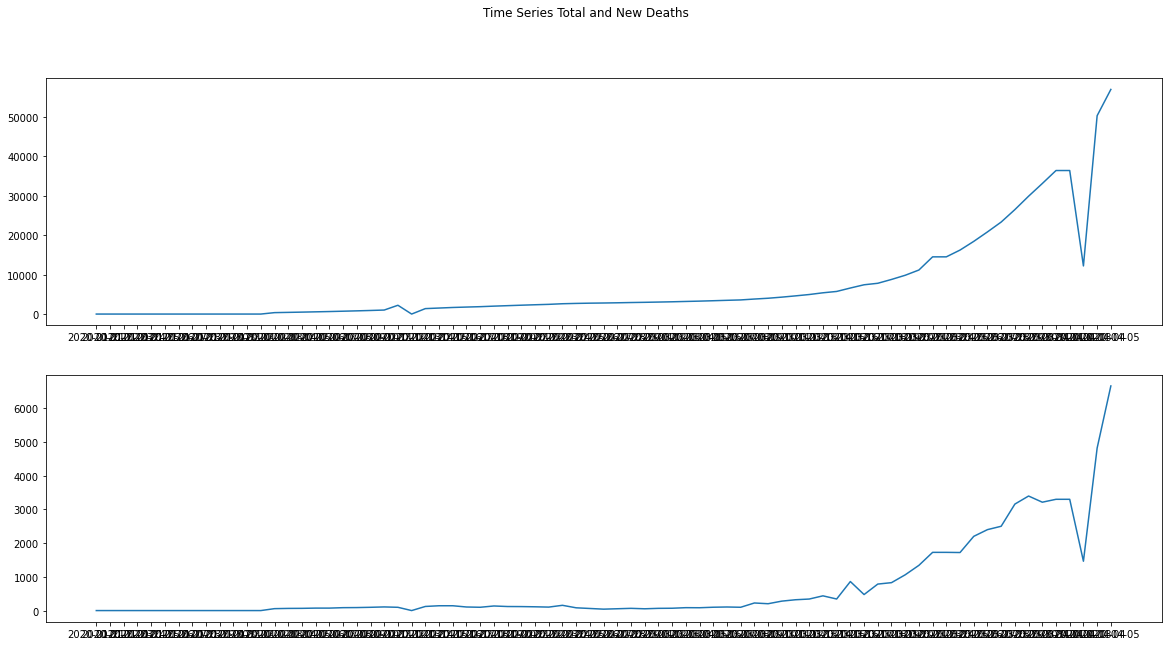

In [4]:
cases_death=cases.groupby('reported_date').sum()
x=cases_death.index
y=cases_death.total_deaths
y1=cases_death.new_total_deaths

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
fig.suptitle('Time Series Total and New Deaths')
ax1.plot(x, y)
ax2.plot(x, y1)
plt.show()

**Remarks: Something wrong with April 3 data**

In [5]:
cases_country=cases.where(cases.reported_date==max(cases.reported_date))
cases1=cases_country.sort_values(by='total_deaths', ascending=False);
cases1=cases1.head(15)

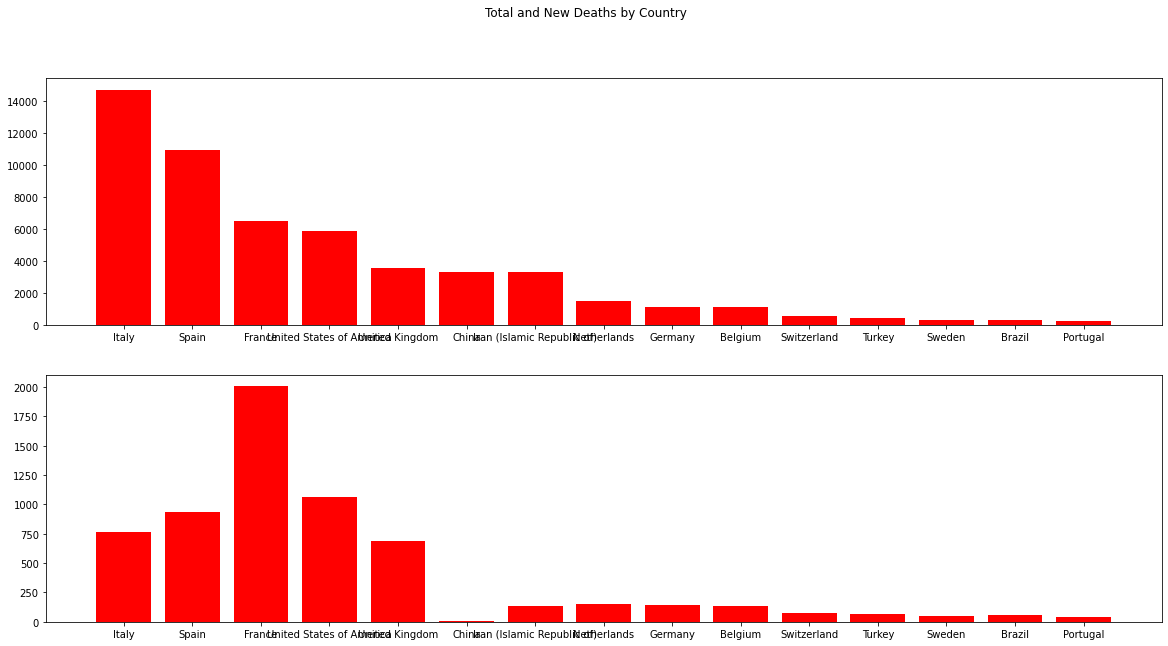

In [6]:
x=cases1.reporting_country_territory
y=cases1.total_deaths
y1=cases1.new_total_deaths

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
fig.suptitle('Total and New Deaths by Country')
ax1.bar(x, y, color='red')
ax2.bar(x, y1, color='red')
plt.show()

In [7]:
cases_tr=cases.where(cases.reported_date==max(cases.reported_date))
cases_tr=cases_tr.groupby('transmission_classification').sum()

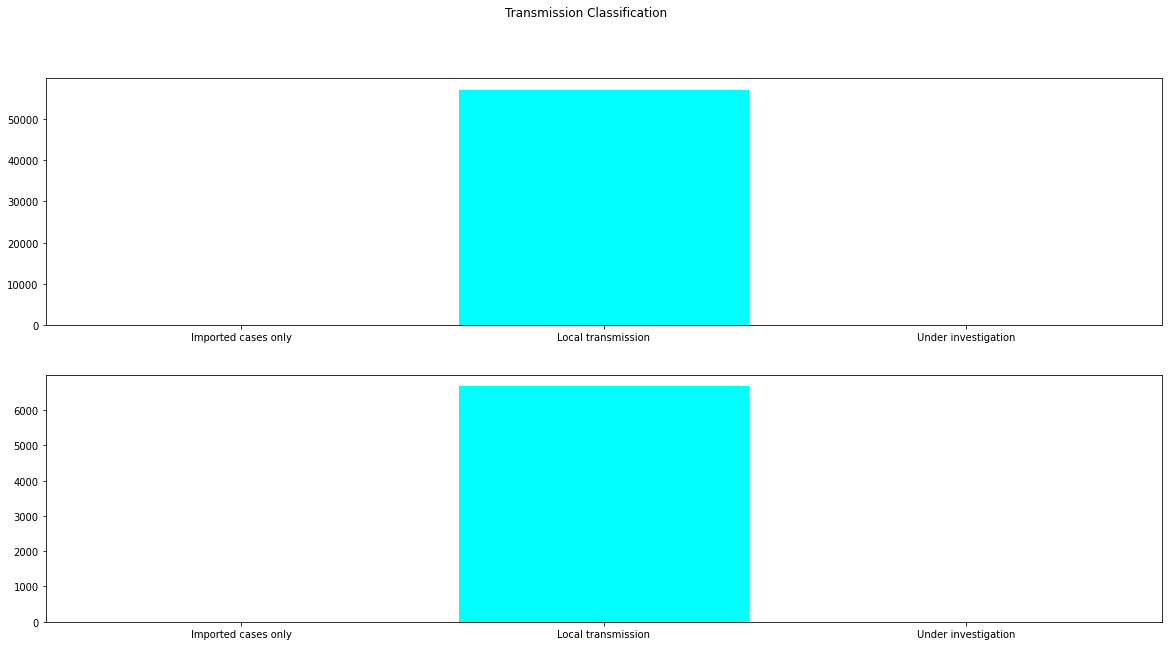

In [8]:
x=cases_tr.index
y=cases_tr.total_deaths
y1= cases_tr.new_total_deaths

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
fig.suptitle('Transmission Classification')
ax1.bar(x, y, color='cyan')
ax2.bar(x, y1, color='cyan')
plt.show()

# Observation 1: Death cases are too high in Italy, Spain, France, UK & USA for both total and new cases.
# Observation 2: Although China is the origin of COVID-19 they have been able to recover the situation as graph shows minimal new death cases. 
# Observation 3: Almost all the death cases (total and new) found as local transmission!
